# BÀI TẬP NHÓM: KHẢO SÁT SỐ GIỜ NGỦ TRUNG BÌNH CỦA SINH VIÊN ĐẠI HỌC

## Mục tiêu
Khảo sát số giờ ngủ trung bình của sinh viên đại học và thực hiện các phân tích thống kê để đưa ra kết luận về thói quen ngủ của sinh viên.

## Dữ liệu
- **Nguồn**: Khảo sát sinh viên các trường đại học
- **Kích thước mẫu**: 103 sinh viên
- **Biến quan tâm**: Thời gian ngủ trung bình một ngày (định dạng HH:MM:SS)

## Các bước thực hiện:
1. **Bước 1**: Khảo sát và thu thập dữ liệu mẫu
2. **Bước 2**: Chuẩn hóa dữ liệu bằng z-score
3. **Bước 3**: Ước lượng kỳ vọng bằng khoảng tin cậy
4. **Bước 4**: Kiểm định giả thuyết thống kê với mức ý nghĩa 5% 


In [2]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Thiết lập style cho biểu đồ (sử dụng style có sẵn)
plt.style.use('default')
sns.set_palette("husl")

print("Đã import thành công các thư viện cần thiết!")


Đã import thành công các thư viện cần thiết!


## BƯỚC 1: ĐỌC VÀ CHUẨN HÓA DỮ LIỆU KHẢO SÁT


In [3]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('KS - Câu trả lời biểu mẫu 1.csv')

print("Thông tin cơ bản về dữ liệu:")
print(f"Kích thước dữ liệu: {df.shape}")
print(f"Số lượng sinh viên: {len(df)}")
print("\nCác cột trong dữ liệu:")
print(df.columns.tolist())

# Hiển thị 5 dòng đầu tiên
print("\n5 dòng đầu tiên của dữ liệu:")
display(df.head())


Thông tin cơ bản về dữ liệu:
Kích thước dữ liệu: (103, 7)
Số lượng sinh viên: 103

Các cột trong dữ liệu:
['Dấu thời gian', 'Giới tính', 'Tuổi', 'Họ và Tên', 'Thời gian ngủ trung bình một ngày', 'Trường học', 'Địa chỉ email']

5 dòng đầu tiên của dữ liệu:


,Dấu thời gian,Giới tính,Tuổi,Họ và Tên,Thời gian ngủ trung bình một ngày,Trường học,Địa chỉ email
0,16/09/2025 22:10:05,Nam,22,Tạ Duy Hiếu,6:30:00,PTIT,NaN
1,16/09/2025 22:10:12,Nam,22,Bùi Công Hậu,6:30:00,Học viện công nghệ bưu chính viễn thông,NaN
2,16/09/2025 22:10:29,Nam,21,Lê Văn Tường,8:30:10,Học viện Công Nghệ và Bưu Chính Viên Thông,NaN
3,16/09/2025 22:28:34,Nữ,20,Nguyễn Thị Huế,7:00:00,Học viện Công nghệ Bưu chính Viễn thông,NaN
4,16/09/2025 22:40:29,Nam,22,Nguyễn Tiến Hưng,7:00:00,PTIT,NaN


In [6]:
# Chuyển đổi thời gian ngủ từ định dạng HH:MM:SS sang giờ (số thập phân)
def time_to_hours(time_str):
    """
    Chuyển đổi thời gian từ định dạng HH:MM:SS sang số giờ (float)
    """
    try:
        # Tách thời gian thành giờ, phút, giây
        time_parts = time_str.split(':')
        hours = int(time_parts[0])
        minutes = int(time_parts[1])
        seconds = int(time_parts[2])
        
        # Chuyển đổi thành giờ thập phân
        total_hours = hours + minutes/60 + seconds/3600
        return total_hours
    except:
        return None

# Áp dụng hàm chuyển đổi
df['sleep_hours'] = df['Thời gian ngủ trung bình một ngày'].apply(time_to_hours)

# Loại bỏ các dòng có dữ liệu không hợp lệ
df_clean = df.dropna(subset=['sleep_hours']).copy()

print(f"Số lượng dữ liệu sau khi làm sạch: {len(df_clean)}")
print(f"Số dữ liệu bị loại bỏ: {len(df) - len(df_clean)}")

# Hiển thị thống kê mô tả
print("\nThống kê mô tả về số giờ ngủ:")
print(df_clean['sleep_hours'].describe())


Số lượng dữ liệu sau khi làm sạch: 103
Số dữ liệu bị loại bỏ: 0

Thống kê mô tả về số giờ ngủ:
count    103.000000
mean       6.847376
std        1.303457
min        3.500000
25%        6.000000
50%        6.750000
75%        7.505556
max       13.508333
Name: sleep_hours, dtype: float64


## BƯỚC 2: CHUẨN HÓA DỮ LIỆU BẰNG Z-SCORE


In [9]:

# Tính z-score sử dụng scipy.stats.zscore như giảng viên
df_clean['z_score'] = stats.zscore(df_clean['sleep_hours'])

print(f"\nZ-score của mẫu:")
print(f"Trung bình z-score: {df_clean['z_score'].mean():.6f}")
print(f"Độ lệch chuẩn z-score: {df_clean['z_score'].std():.6f}")

# Hiển thị một số giá trị z-score
print(f"\nMột số giá trị z-score:")
display(df_clean[['Họ và Tên', 'sleep_hours', 'z_score']].head(10))



Z-score của mẫu:
Trung bình z-score: -0.000000
Độ lệch chuẩn z-score: 1.004890

Một số giá trị z-score:


,Họ và Tên,sleep_hours,z_score
0,Tạ Duy Hiếu,6.500000,-0.267807
1,Bùi Công Hậu,6.500000,-0.267807
2,Lê Văn Tường,8.502778,1.276219
3,Nguyễn Thị Huế,7.000000,0.117664
4,Nguyễn Tiến Hưng,7.000000,0.117664
5,Phạm Mạnh Quân,8.000000,0.888606
6,Ngô Văn Thăng,7.000000,0.117664
7,Thương Thanh Long,13.508333,5.135212
8,Nguyễn Công Gia Hiển,9.000000,1.659548
9,Đỗ Tùng,7.000000,0.117664


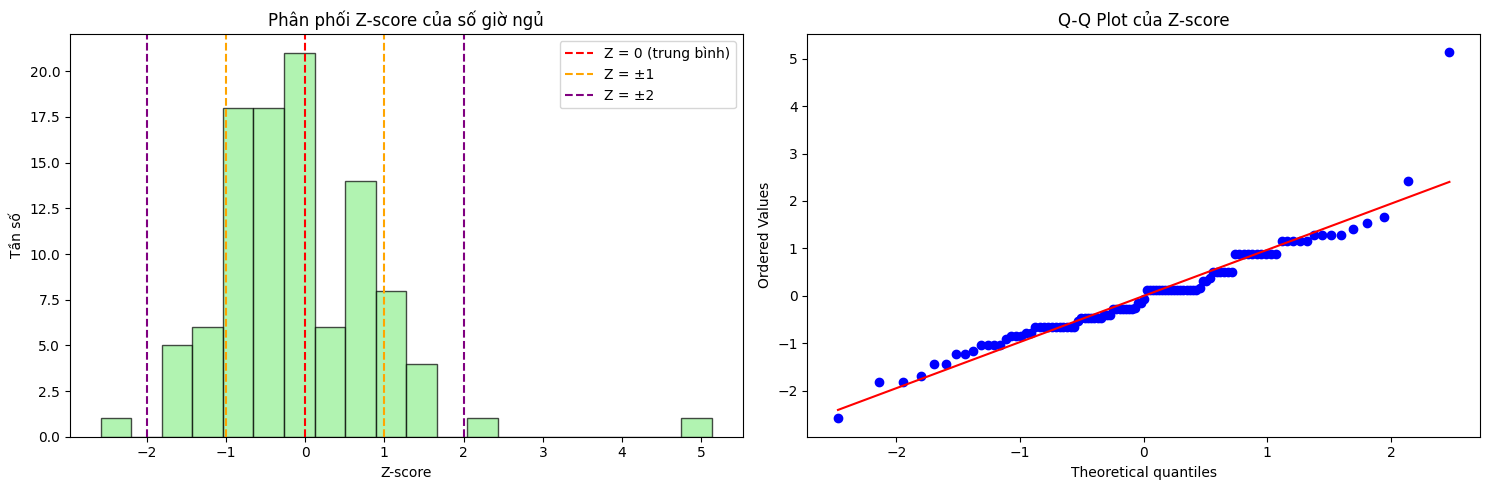

=== THỐNG KÊ Z-SCORE ===
Min z-score: -2.5806
Max z-score: 5.1352
Trung bình z-score: -0.000000
Số quan sát có |z-score| > 2: 3
Số quan sát có |z-score| > 3: 1


In [8]:
# Trực quan hóa z-score
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram của z-score
axes[0].hist(df_clean['z_score'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0].set_title('Phân phối Z-score của số giờ ngủ')
axes[0].set_xlabel('Z-score')
axes[0].set_ylabel('Tần số')
axes[0].axvline(0, color='red', linestyle='--', label='Z = 0 (trung bình)')
axes[0].axvline(1, color='orange', linestyle='--', label='Z = ±1')
axes[0].axvline(-1, color='orange', linestyle='--')
axes[0].axvline(2, color='purple', linestyle='--', label='Z = ±2')
axes[0].axvline(-2, color='purple', linestyle='--')
axes[0].legend()

# Q-Q plot của z-score
stats.probplot(df_clean['z_score'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot của Z-score')

plt.tight_layout()
plt.show()

# Thống kê về z-score
print("=== THỐNG KÊ Z-SCORE ===")
print(f"Min z-score: {df_clean['z_score'].min():.4f}")
print(f"Max z-score: {df_clean['z_score'].max():.4f}")
print(f"Trung bình z-score: {df_clean['z_score'].mean():.6f}")
print(f"Số quan sát có |z-score| > 2: {len(df_clean[abs(df_clean['z_score']) > 2])}")
print(f"Số quan sát có |z-score| > 3: {len(df_clean[abs(df_clean['z_score']) > 3])}")


## BƯỚC 3: ƯỚC LƯỢNG KỲ VỌNG BẰNG KHOẢNG TIN CẬY


In [10]:
sample_mean = df_clean['sleep_hours'].mean()
sample_std = np.std(df_clean['sleep_hours'], ddof = 1 )

# Ước lượng kỳ vọng bằng khoảng tin cậy (sử dụng Z-distribution cho n > 30)
n = len(df_clean)
confidence_level = 0.95  # 95% khoảng tin cậy
alpha = 1 - confidence_level

# Tính toán khoảng tin cậy
# Sử dụng phân phối chuẩn tắc (Z) vì mẫu lớn (n > 30)
z_critical = stats.norm.ppf(1 - alpha/2)
margin_of_error = z_critical * (sample_std / np.sqrt(n))

confidence_interval_lower = sample_mean - margin_of_error
confidence_interval_upper = sample_mean + margin_of_error

print("=== ƯỚC LƯỢNG KỲ VỌNG BẰNG KHOẢNG TIN CẬY ===")
print(f"Kích thước mẫu (n): {n}")
print(f"Trung bình mẫu (X̄): {sample_mean:.4f} giờ")
print(f"Phương sai mẫu hiệu chỉnh (s): {sample_std:.4f} giờ")
print(f"Mức tin cậy: {confidence_level*100}%")
print(f"Giá trị Z tới hạn: {z_critical:.4f}")
print(f"Sai số chuẩn: {sample_std/np.sqrt(n):.4f}")
print(f"Biên độ sai số: {margin_of_error:.4f} giờ")
print(f"\nKhoảng tin cậy {confidence_level*100}% cho kỳ vọng:")
print(f"[{confidence_interval_lower:.4f}, {confidence_interval_upper:.4f}] giờ")
print(f"Tức là từ {confidence_interval_lower:.2f} giờ đến {confidence_interval_upper:.2f} giờ")


=== ƯỚC LƯỢNG KỲ VỌNG BẰNG KHOẢNG TIN CẬY ===
Kích thước mẫu (n): 103
Trung bình mẫu (X̄): 6.8474 giờ
Phương sai mẫu hiệu chỉnh (s): 1.3035 giờ
Mức tin cậy: 95.0%
Giá trị Z tới hạn: 1.9600
Sai số chuẩn: 0.1284
Biên độ sai số: 0.2517 giờ

Khoảng tin cậy 95.0% cho kỳ vọng:
[6.5957, 7.0991] giờ
Tức là từ 6.60 giờ đến 7.10 giờ


## BƯỚC 4: KIỂM ĐỊNH GIẢ THUYẾT THỐNG KÊ VỚI MỨC Ý NGHĨA 5%

### Thiết lập giả thuyết:
- **H₀ (Giả thuyết không)**: μ = μ₀ (Số giờ ngủ trung bình của sinh viên bằng giá trị tham chiếu)
- **H₁ (Giả thuyết đối)**: μ < μ₀ (Số giờ ngủ trung bình của sinh viên nhỏ hơn giá trị tham chiếu)

### Giá trị tham chiếu:
Sử dụng **7.2167 giờ** làm giá trị tham chiếu (μ₀ = 7.2167) để kiểm định xem sinh viên có ngủ ít hơn mức này không.


In [14]:
# Kiểm định giả thuyết thống kê - KIỂM ĐỊNH MỘT PHÍA (H1 < H0)
mu_0 = 7.2167  # Giá trị tham chiếu mới (7.2167 giờ)
alpha = 0.05  # Mức ý nghĩa 5%

print("=== KIỂM ĐỊNH GIẢ THUYẾT - MỘT PHÍA (DÙNG PHÂN PHỐI CHUẨN TẮC) ===")
print(f"Giả thuyết không (H₀): μ = {mu_0} giờ")
print(f"Giả thuyết đối (H₁): μ < {mu_0} giờ")
print(f"Mức ý nghĩa (α): {alpha}")
print(f"Loại kiểm định: Một phía (bên trái)")

# Tính toán thống kê kiểm định z (vì n > 30)
z_statistic = (sample_mean - mu_0) / (sample_std / np.sqrt(n))

# Tìm giá trị z tới hạn từ phân phối chuẩn tắc
z_critical = stats.norm.ppf(alpha)  # Sử dụng stats.norm.ppf cho Z-distribution

print(f"\n=== TÍNH TOÁN THỐNG KÊ KIỂM ĐỊNH ===")
print(f"Trung bình mẫu (X̄): {sample_mean:.4f} giờ")
print(f"Giá trị tham chiếu (μ₀): {mu_0} giờ")
print(f"Độ lệch chuẩn mẫu (s): {sample_std:.4f} giờ")
print(f"Sai số chuẩn: {sample_std/np.sqrt(n):.4f}")
print(f"Thống kê Z: {z_statistic:.4f}")
print(f"Giá trị Z tới hạn (một phía): {z_critical:.4f}")

# Tính p-value cho kiểm định một phía bằng phân phối chuẩn tắc
p_value = stats.norm.cdf(z_statistic)  # Sử dụng stats.norm.cdf cho Z-distribution

print(f"\n=== KẾT QUẢ KIỂM ĐỊNH ===")
print(f"P-value (một phía): {p_value:.6f}")
print(f"Giá trị Z tới hạn: {z_critical:.4f}")

# Kết luận dựa trên so sánh giá trị thống kê và giá trị tới hạn
if z_statistic < z_critical:
    conclusion = "Bác bỏ H₀"
    interpretation = f"Với mức ý nghĩa {alpha*100}%, có đủ cơ sở thống kê để kết luận rằng số giờ ngủ trung bình của sinh viên nhỏ hơn {mu_0} giờ."
else:
    conclusion = "Chưa đủ cơ sở để bác bỏ H₀"
    interpretation = f"Với mức ý nghĩa {alpha*100}%, chưa đủ cở sở thống kê để kết luận rằng số giờ ngủ trung bình của sinh viên nhỏ hơn {mu_0} giờ."

print(f"\nKết luận: {conclusion}")
print(f"Ý nghĩa: {interpretation}")



=== KIỂM ĐỊNH GIẢ THUYẾT - MỘT PHÍA (DÙNG PHÂN PHỐI CHUẨN TẮC) ===
Giả thuyết không (H₀): μ = 7.2167 giờ
Giả thuyết đối (H₁): μ < 7.2167 giờ
Mức ý nghĩa (α): 0.05
Loại kiểm định: Một phía (bên trái)

=== TÍNH TOÁN THỐNG KÊ KIỂM ĐỊNH ===
Trung bình mẫu (X̄): 6.8474 giờ
Giá trị tham chiếu (μ₀): 7.2167 giờ
Độ lệch chuẩn mẫu (s): 1.3035 giờ
Sai số chuẩn: 0.1284
Thống kê Z: -2.8756
Giá trị Z tới hạn (một phía): -1.6449

=== KẾT QUẢ KIỂM ĐỊNH ===
P-value (một phía): 0.002016
Giá trị Z tới hạn: -1.6449

Kết luận: Bác bỏ H₀
Ý nghĩa: Với mức ý nghĩa 5.0%, có đủ cơ sở thống kê để kết luận rằng số giờ ngủ trung bình của sinh viên nhỏ hơn 7.2167 giờ.


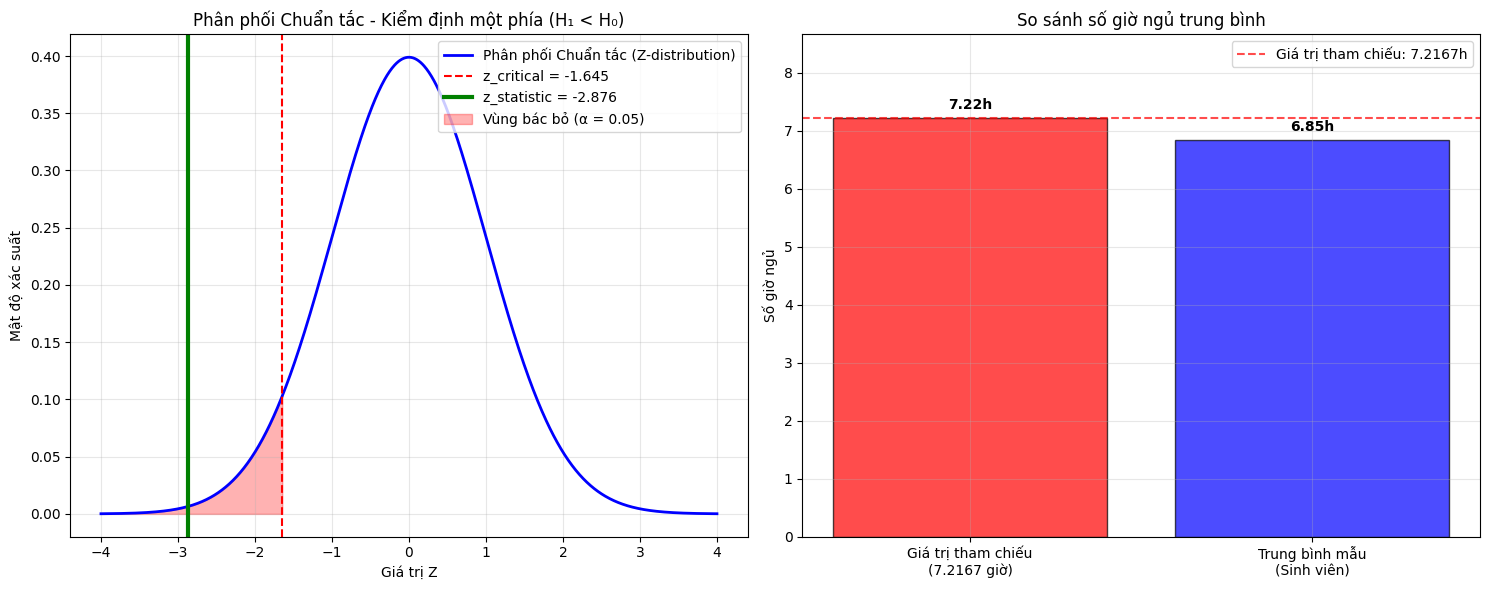

In [15]:
# Trực quan hóa kết quả kiểm định một phía (sử dụng phân phối chuẩn tắc)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Biểu đồ 1: Phân phối chuẩn tắc (Z) với vùng bác bỏ
x = np.linspace(-4, 4, 1000)
z_dist = stats.norm.pdf(x) # Sử dụng phân phối chuẩn tắc

axes[0].plot(x, z_dist, 'b-', linewidth=2, label='Phân phối Chuẩn tắc (Z-distribution)')
axes[0].axvline(z_critical, color='red', linestyle='--', label=f'z_critical = {z_critical:.3f}')
axes[0].axvline(z_statistic, color='green', linestyle='-', linewidth=3, label=f'z_statistic = {z_statistic:.3f}')

# Tô màu vùng bác bỏ (bên trái)
x_reject = x[x <= z_critical]
axes[0].fill_between(x_reject, 0, stats.norm.pdf(x_reject), 
                     color='red', alpha=0.3, label='Vùng bác bỏ (α = 0.05)')

axes[0].set_title('Phân phối Chuẩn tắc - Kiểm định một phía (H₁ < H₀)')
axes[0].set_xlabel('Giá trị Z')
axes[0].set_ylabel('Mật độ xác suất')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Biểu đồ 2: So sánh trung bình mẫu với giá trị tham chiếu (không thay đổi)
categories = [f'Giá trị tham chiếu\n({mu_0} giờ)', 'Trung bình mẫu\n(Sinh viên)']
values = [mu_0, sample_mean]
colors = ['red', 'blue']

bars = axes[1].bar(categories, values, color=colors, alpha=0.7, edgecolor='black')
axes[1].set_title('So sánh số giờ ngủ trung bình')
axes[1].set_ylabel('Số giờ ngủ')
axes[1].set_ylim(0, max(values) * 1.2)

# Thêm giá trị lên cột
for bar, value in zip(bars, values):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{value:.2f}h', ha='center', va='bottom', fontweight='bold')

# Thêm đường tham chiếu
axes[1].axhline(y=mu_0, color='red', linestyle='--', alpha=0.7, label=f'Giá trị tham chiếu: {mu_0}h')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

